ChEn-3170: Computational Methods in Chemical Engineering Fall 2020 UMass Lowell; Prof. V. F. de Almeida **10Nov20**

# Laboratory Work 11 (12Nov20)
$
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Cmtrx}{\boldsymbol{\mathsf{C}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Qmtrx}{\boldsymbol{\mathsf{Q}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\yvec}{\boldsymbol{\mathsf{y}}}
  \newcommand{\zvec}{\boldsymbol{\mathsf{z}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \DeclareMathOperator{\rank}{rank}
  \DeclareMathOperator{\abs}{abs}
$

### Name: `Your Name`

### Rubric for each assignment: 

|       Context        |  Points |
| -----------------------     | ------- |
| Precision of the answer     |   80%   |
| Answer Markdown readability |   10%   |
| Code readability            |   10%   |
    

### <span style="color:red">Guidance:</span>

+  <span style="color:red"> 
    Save your work frequently to a file locally to your computer.
   </span>
+  <span style="color:red">
    During your work and before submitting the final version do:</span> Kernel -> Restart & Run All<span style="color:red">, to verify your notebook runs correctly.
   </span>
+  <span style="color:red">
    Save your file again.
   </span>
+  <span style="color:red">
    Upload the notebook file: 
   </span> labwork-xx.ipynb<span style="color:red"> on Blackboard.</span>

## <span style="color:blue">Use the material covered in Notebooks 13 and 14.</span>

---
### Table of Assignments<a id="toa"></a>
* [Assignment 1 (15 pts)](#a1) Single reaction, 3 species in closed reactor vessel.
 - [1.1)](#a11) Produce a plot of the equilibrium function as a function of the normalized extent of reaction.
 - [1.2)](#a12) Demonstrate the quadratic convergence of Newton's method.
 - [1.3)](#a13) Plot the normalized extent of reaction at equilibrium on the equilibrium function plot.
 - [1.4)](#a14) Find 3 different initial mole fractions of $A$, $B$ and $C$ that produce the same equilibrium molar fraction.
* [Assignment 2 (40 pts)](#a2) Single reaction, 5 species in closed reactor vessel.
 - [2.1)](#a21) Produce a plot of the equilibrium function as a function of the normalized extent of reaction.
 - [2.2)](#a22) Demonstrate the quadratic convergence of Newton's method.
 - [2.3)](#a23) Plot the normalized extent of reaction at equilibrium on the equilibrium function plot.
* [Assignment 3 (40 pts)](#a3) Single reaction, 6 species in closed reactor vessel.
 - [3.1)](#a31) Produce a plot of the equilibrium function as a function of the normalized extent of reaction.
 - [3.2)](#a32) Demonstrate the quadratic convergence of Newton's method.
 - [3.3)](#a33) Plot the normalized extent of reaction at equilibrium on the equilibrium function plot.
* [Assignment 4 (5 pts)](#a4) Unclear points
---

## <span style="color:blue">[Assignment 1 (20 pts)](#toa)</span><a id="a1"></a>  

### <span style="color:blue"> Find the equilibrium molar fraction for the following reaction:</span>
<br>
<span style="color:blue"> 
\begin{equation*}
\text{A} + \text{B} \overset{K_x}{\longleftrightarrow} \text{C}
\end{equation*}
</span>

### <span style="color:blue"> taking place in a closed reactor vessel. At some initial time, the charge to the reactor vessel was:</span>
   
Name                        | Parameter    | Value    | 
----------------------------|--------------|----------| 
initial mole fraction of A  | $x_{A_0}$    | 0.78     | 
initial mole fraction of B  | $x_{B_0}$    | 0.12     | 
initial mole fraction of C  | $x_{C_0}$    | residual | 
mole equilibrium constant   | $K_\text{x}$ | 97.6     |    

### <span style="color:blue">[1.1)](#toa) Produce a plot of the equilibrium function as a function of the normalized extent of reaction (following the plot below). How many roots are there? What is an initial guess for Newton's method to find the appropriate root? Justfiy your answer.</span><a id="a11"></a>

In [82]:
import numpy as np

def keq_function(x_vec, eq_kx_cte, stoic_row):
    
    value = eq_kx_cte - x_vec[0]**stoic_row[0] * x_vec[1]**stoic_row[1] \
                        * x_vec[2]**stoic_row[2]
    
    return value

def molar_fractions(ext_hat, x_vec_0, stoic_row):
    
    assert abs(x_vec_0.sum()-1.0) <= 1e-10
    assert abs( 1.0 + ext_hat * stoic_row.sum() ) >= 1e-8
    
    x_vec = ( x_vec_0 + ext_hat * stoic_row ) / \
            ( 1.0 + ext_hat * stoic_row.sum() )
    
    return x_vec
def grad_x_k_function(x_vec, eq_kx_cte, stoic_row):
    
    import numpy as np
    x_vec_local = np.copy(x_vec)
    
    # Correct for division by a very small number (null products)
    max_x = x_vec_local.max()
    
    for i in range(x_vec_local.size):
        if x_vec_local[i] < 1e-8:
            x_vec_local[i] = max_x # some reasonable mole fraction
            
    x_vec_inv = 1.0/x_vec_local
    
    grad_vec = -eq_kx_cte * stoic_row*x_vec_inv
    
    return grad_vec

def d_ext_molar_fractions(ext_hat, x_vec_0, stoic_row):
    
    dext_x_vec = ( stoic_row - x_vec_0 * stoic_row.sum() ) / \
                 ( 1.0 + ext_hat * stoic_row.sum() )**2
    
    return dext_x_vec
def f_eq(ext_hat, x_a_0, x_b_0, x_c_0, eq_kx_cte):
           
    value =   (eq_kx_cte+1)*ext_hat**2  \
            - (1-x_c_0)*(eq_kx_cte+1)*ext_hat \
            + x_a_0 * x_b_0 * eq_kx_cte - x_c_0
        
    return value
def f_eq_prime(ext_hat, x_c_0, eq_kx_cte):    
    # f_eq = (eq_kx_cte+1)*ext_hat**2 - (1-x_c_0)*(eq_kx_cte+1)*ext_hat + x_a_0 * x_b_0 * eq_kx_cte - x_c_0       
    value = 2.0*(eq_kx_cte+1)*ext_hat - (1-x_c_0)*(eq_kx_cte+1)
        
    return value

In [83]:
'''1.1) Parameters for chemical equilibrium of A + B <-> C'''

x_a_0 = 0.78
x_b_0 = 0.12
x_c_0 = 0.1


species_names = ['A','B','C']

import numpy as np
stoic_row = np.array([-1, -1, 1])

reaction =  str(-stoic_row[0])+' A + '+str(-stoic_row[1])+' B '\
           +' <=> '\
           +str(stoic_row[2])+' C '

x_vec_0 = np.array([x_a_0, x_b_0, x_c_0])

assert abs(np.sum(x_vec_0) - 1.0) <= 1e-12
assert np.all(x_vec_0 >=0.0)

eq_kx_cte = 97.6

print('reaction: ',reaction)

reaction:  1 A + 1 B  <=> 1 C 


In [84]:
'''1.1) Equilibrium function at values or array values'''
(ids,) = np.where(stoic_row>0)
ext_hat_min = np.max(-x_vec_0[ids]/np.abs(stoic_row[ids]))

(ids,) = np.where(stoic_row<0)
ext_hat_max = np.min(x_vec_0[ids]/np.abs(stoic_row[ids]))

# reduce the ends of the interval by 0.5% to avoid infinite values in the equilibrium function
dext = (ext_hat_max - ext_hat_min)*.005
ext_hat_min += dext
ext_hat_max -= dext

print('ext_hat_min = %+1.3e'%ext_hat_min)
print('ext_hat_max = %+1.3e'%ext_hat_max)



ext_hat_min = -9.890e-02
ext_hat_max = +1.189e-01


In [85]:
'''1.1) Function: plot equilibrium function'''
def plot_function(ex_min, ex_max, n_pts,
                  x_a_0, x_b_0, x_c_0, eq_kx_cte,
                  ext_hat_root=None  ):
    
    import matplotlib.pyplot as plt
    %matplotlib inline
    
    plt.figure(1, figsize=(8, 6))
    
    import numpy as np
    ex_vec = np.linspace(ex_min, ex_max, n_pts)
    
    plt.plot(ex_vec, f_eq(ex_vec, x_a_0, x_b_0, x_c_0, eq_kx_cte),'b-',label='$f_{eq}$')
    
    plt.xlabel(r'$\hat{\varepsilon}$',fontsize=18)
    plt.ylabel(r'$f_{eq}(\hat{\varepsilon})$',fontsize=18)
    plt.title('Computing the Roots of $f(x)$',fontsize=20)
    plt.legend(loc='best',fontsize=12)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    
    (x_min,x_max) = plt.xlim()
    dx = abs(x_max-x_min)
    x_text = (x_max+x_min)/2
    
    (y_min,y_max) = plt.ylim()
    dy = abs(y_max-y_min)
    y_text = y_max - dy*0.05
    
    plt.text(x_text, y_text, r'$x_{A_0}=$%8.2e'%x_a_0,fontsize=16)
    y_text -= dy*0.06
    plt.text(x_text, y_text, r'$x_{B_0}=$%8.2e'%x_b_0,fontsize=16)
    y_text -= dy*0.06
    plt.text(x_text, y_text, r'$x_{C_0}=$%8.2e'%x_c_0,fontsize=16)
    y_text -= dy*0.06
    plt.text(x_text, y_text, r'$K_x=$%8.2e'%eq_kx_cte,fontsize=16)
    
    
    if ext_hat_root is not None:
        
        plt.plot(ext_hat_root, 0.0,'r*',label='root',markersize=14)
               
        (x_min,x_max) = plt.xlim()
        dx = abs(x_max-x_min)
        x_text = ext_hat_root + dx*0.01
    
        (y_min,y_max) = plt.ylim()
        dy = abs(y_max-y_min)
        y_text = 0.0 + dy*0.01
    
        plt.text(x_text, y_text, r'$\hat{\varepsilon}^*=$%8.2e'%ext_hat_root,fontsize=16)
    
    
    plt.grid(True)
    plt.show()
    print('')
    
    return

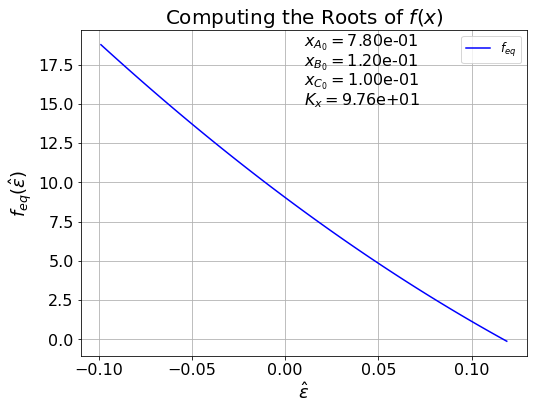

In [86]:
'''1.1 Plot equilibrium function'''
n_pts = 100

plot_function(ext_hat_min, ext_hat_max, n_pts, x_a_0, x_b_0, x_c_0, eq_kx_cte)

**Justification:**

### <span style="color:blue">[1.2)](#toa) Demonstrate the quadratic convergence of Newton's method and explain.</span><a id="a12"></a>

In [87]:
'''1.2) Equilibrium function derivative'''
def f_eq_prime(ext_hat, x_c_0, eq_kx_cte):
    """Derivative of equilibrium function f'(ext_hat) for A + B <=> C.

    Parameters
    ----------
    ext_hat: float or numpy.ndarray, required
        Normalized extent of reaction
    x_c_0: float, required
        Mole fraction of species B
    eq_kx_cte: float, required
        Mole equilibrium reaction constant.
    
    Returns
    -------
    value: float or numpy.ndarray
        Value or values of the root function evaluated at `ext_hat`.

    Examples
    --------
    """
    # f_eq = (eq_kx_cte+1)*ext_hat**2 - (1-x_c_0)*(eq_kx_cte+1)*ext_hat + x_a_0 * x_b_0 * eq_kx_cte - x_c_0       
    value = 2.0*(eq_kx_cte+1)*ext_hat - (1-x_c_0)*(eq_kx_cte+1)
        
    return value

In [88]:
'''1.2) Newton's method'''

def newton_solve(x_a_0, x_b_0, x_c_0, eq_kx_cte,
                 ext_hat_0=0.0, k_max=30, tolerance=1.0e-10, verbose=True):

    # Other initialization
    delta_k = 1e+10   # Newton's update
    f_k     = 1e+10
    ext_hat = ext_hat_0

    if verbose is True:
        print('\n')
        print('******************************************************')
        print("          Newton's Method Iterations                  ")
        print('******************************************************')
        print("k |  f(e_k)  |  f'(e_k) | |del e_k| |    e_k   |convg|")
        print('------------------------------------------------------')

    import math
    
    k = 0 # step counter
    
    while (abs(delta_k) > tolerance or abs(f_k) > tolerance) and k <= k_max:
        
        f_k       = f_eq(ext_hat, x_a_0, x_b_0, x_c_0, eq_kx_cte)
        
        f_prime_k = f_eq_prime(ext_hat, x_c_0, eq_kx_cte)
        
        delta_k_old = delta_k
        
        delta_k = -f_k / f_prime_k # Newton's update
        
        ext_hat += delta_k
        
        if k > 0:
            if delta_k != 0.0 and delta_k_old != 0.0:
                convergence_factor = math.log(abs(delta_k),10) / math.log(abs(delta_k_old),10)
            else:
                convergence_factor = 0.0  
        else:
            convergence_factor = 0.0
            
        k = k + 1 # increment counter
        
        if verbose is True:
            print('%2i %+5.3e %+5.3e %+5.3e  %+5.3e %5.2f'%\
                  (k,f_k, f_prime_k, abs(delta_k), ext_hat, convergence_factor))
            
    # Exit the while loop here
    if verbose is True:
        print('******************************************************') 
        print('Root = %8.5e'%ext_hat)
    
    return ext_hat

In [89]:
'''1.2 Find root and equilibrium molar fractions'''
ext_hat_0 = (ext_hat_max + ext_hat_min)/2.0

k_max = 20
tolerance = 1.0e-8

ext_hat = newton_solve(x_vec_0, eq_kx_cte, stoic_row,
                       ext_hat_0, k_max, tolerance)

x_vec = molar_fractions(ext_hat, x_vec_0, stoic_row)

print('')
print('Equilibrium mole fractions:\n')
for (x,spc) in zip(x_vec,species_names):
    print('x_%s = %5.3e (%4.1f%%)'%(spc,x,round(x*100,1)))
    
assert np.all(x_vec >= 0.0)
assert abs(x_vec.sum() - 1.0) <= 1e-10



******************************************************
          Newton's Method Iterations                  
******************************************************
k |  f(e_k)  |  f'(e_k) | |del e_k| |    e_k   |convg|
------------------------------------------------------


TypeError: only size-1 arrays can be converted to Python scalars

**Explanation of quadratic convergence:**

### <span style="color:blue">[1.3)](#toa) Plot the normalized extent of reaction at equilibrium on the equilibrium function plot as follows.</span><a id="a13"></a>

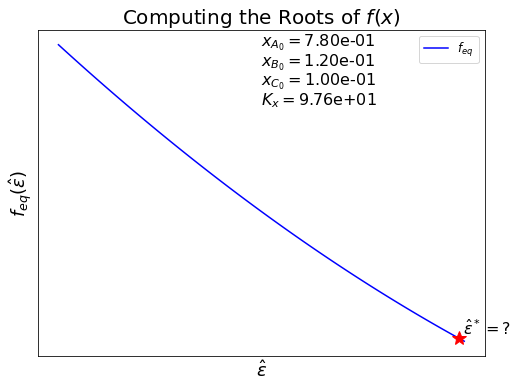

In [8]:
'''1.3 Plot equilibrium function with root'''


### <span style="color:blue">[1.4)](#toa) Find 3 different initial mole fractions of $A$, $B$ and $C$ that produce the same equilibrium molar fraction. Show the results and explain your choices.</span><a id="a14"></a>

In [ ]:
'''1.4 Alternate initial molar fraction 1'''


In [ ]:
'''1.4 Alternate initial molar fraction 2'''


In [ ]:
'''1.4 Alternate initial molar fraction 3'''


**Explanation of choices of initial molar fractions:**

## <span style="color:blue">[Assignment 2 (40 pts)](#toa)</span><a id="a2"></a>

### <span style="color:blue"> Find the equilibrium molar fraction for the following reaction:</span>
<br>
<span style="color:blue">
\begin{equation*}
\nu_A\,\text{A} + \nu_B\,\text{B} 
\overset{K_x}{\longleftrightarrow} 
\nu_C\,\text{C} + \nu_D\,\text{D} + \nu_E\,\text{E}
\end{equation*}
</span>

### <span style="color:blue"> taking place in a closed reactor vessel. At some initial time, the charge to the reactor vessel was:</span>

Name                        | Parameter    | Value  | Name     | Parameter | Value |
----------------------------|--------------|--------|----------|-----------|-------|
initial mole fraction of A  | $x_{A_0}$    | 0.12   | stoic. coef. A | $\nu_A$   |  2  |
initial mole fraction of B  | $x_{B_0}$    | 0.23   | stoic. coef. B | $\nu_B$   |  1.3  |
initial mole fraction of C  | $x_{C_0}$    | 0.45   | stoic. coef. C | $\nu_C$   |  0.4  |
initial mole fraction of D  | $x_{D_0}$    | 0.1   | stoic. coef. D | $\nu_D$   |  1.5    |
initial mole fraction of E  | $x_{E_0}$    |residual| stoic. coef. E | $\nu_E$   |  0.3  |
mole equilibrium constant   | $K_\text{x}$ | 23.4  |     .    |    .      |  .    |

### <span style="color:blue">[2.1)](#toa) Produce a plot of the equilibrium function as a function of the normalized extent of reaction. How many roots are there? What is an initial guess for Newton's method to find the appropriate root? Justfiy your answer.</span><a id="a21"></a>

In [36]:
'''2.1) Parameters for chemical equilibrium'''
x_a_0 = 0.12
x_b_0 = 0.23
x_c_0 = 0.45
x_d_0 = 0.1
x_e_0 = 0.1

species_names = ['A','B','C','D','E']

import numpy as np
stoic_row = np.array([-2, -1.3, 0.4, 1.5, 0.3])

reaction =  str(-stoic_row[0])+' A + '+str(-stoic_row[1])+' B '\
           +' <=> '\
           +str(stoic_row[2])+' C + '+str(stoic_row[3])+' D + ' +str(stoic_row[4])+' E '

x_vec_0 = np.array([x_a_0, x_b_0, x_c_0, x_d_0, x_e_0])

assert abs(np.sum(x_vec_0) - 1.0) <= 1e-12
assert np.all(x_vec_0 >=0.0)

eq_kx_cte = 23.4

print('reaction: ',reaction)

reaction:  2.0 A + 1.3 B  <=> 0.4 C + 1.5 D + 0.3 E 


In [39]:
'''2.1) Molar fractions function'''
def molar_fractions(ext_hat, x_vec_0, stoic_row):
    
    assert abs(x_vec_0.sum()-1.0) <= 1e-10
    assert abs( 1.0 + ext_hat * stoic_row.sum() ) >= 1e-8
    
    x_vec = ( x_vec_0 + ext_hat * stoic_row ) / \
            ( 1.0 + ext_hat * stoic_row.sum() )
    
    return x_vec

In [40]:
'''2.1) Derivative of the molar fractions funtio wrt normalized extent of reaction'''
def d_ext_molar_fractions(ext_hat, x_vec_0, stoic_row):
    
    dext_x_vec = ( stoic_row - x_vec_0 * stoic_row.sum() ) / \
                 ( 1.0 + ext_hat * stoic_row.sum() )**2
    
    return dext_x_vec

In [59]:
'''2.1) Equilibrium function'''
def f_eq(ext_hat, x_a_0, x_b_0, x_c_0, x_d_0, x_e_0, eq_kx_cte):
    """Root function f(ext_hat) for A + B <=> C.

    Parameters
    ----------
    ext_hat: float or numpy.ndarray, required
        Normalized extent of reaction. If `ext_hat` is an array, 
        the return value is also an array of values.
    x_a_0: float, required
        Mole fraction of species A.
    x_b_0: float, required
        Mole fraction of species B.
    x_c_0: float, required
        Mole fraction of species B.
    eq_kx_cte: float, required
        Mole equilibrium reaction constant.
    
    Returns
    -------
    value: float or numpy.ndarray
        Value or array of values of the equilibrium function 
        evaluated at `ext_hat`.

    Examples
    --------
    """
    
    assert abs(x_a_0 + x_b_0 + x_c_0 + x_d_0 + x_e_0 - 1.0) <= 1e-12
           
    value =   (eq_kx_cte+1)*ext_hat**2  \
            - (1-x_c_0)*(eq_kx_cte+1)*ext_hat \
            + x_a_0 * x_b_0 * eq_kx_cte - x_c_0 - x_d_0 - x_e_0
        
    return value

def f_eq_prime(ext_hat, x_c_0, x_d_0, x_e_0, eq_kx_cte):

    # f_eq = (eq_kx_cte+1)*ext_hat**2 - (1-x_c_0)*(eq_kx_cte+1)*ext_hat + x_a_0 * x_b_0 * eq_kx_cte - x_c_0 - x_d_0 - x_e_0       
    value = 2.0*(eq_kx_cte+1)*ext_hat - (1-x_c_0-x_d_0-x_e_0)*(eq_kx_cte+1)
        
    return value

In [41]:
'''2.1) Gradient with respect to molar fractions of the equilibrium function'''
def grad_x_k_function(x_vec, eq_kx_cte, stoic_row):
    
    import numpy as np
    x_vec_local = np.copy(x_vec)
    
    # Correct for division by a very small number (null products)
    max_x = x_vec_local.max()
    
    for i in range(x_vec_local.size):
        if x_vec_local[i] < 1e-8:
            x_vec_local[i] = max_x # some reasonable mole fraction
            
    x_vec_inv = 1.0/x_vec_local
    
    grad_vec = -eq_kx_cte * stoic_row*x_vec_inv
    
    return grad_vec

In [57]:
'''2.1) Function: plot equilibrium function'''

def plot_function(ex_min, ex_max, n_pts,
                  x_a_0, x_b_0, x_c_0, x_d_0, x_e_0, eq_kx_cte,
                  ext_hat_root=None  ):
    
    import matplotlib.pyplot as plt
    %matplotlib inline
    
    plt.figure(1, figsize=(8, 6))
    
    import numpy as np
    ex_vec = np.linspace(ex_min, ex_max, n_pts)
    
    plt.plot(ex_vec, f_eq(ex_vec, x_a_0, x_b_0, x_c_0, x_d_0, x_e_0, eq_kx_cte),'b-',label='$f_{eq}$')
    
    plt.xlabel(r'$\hat{\varepsilon}$',fontsize=18)
    plt.ylabel(r'$f_{eq}(\hat{\varepsilon})$',fontsize=18)
    plt.title('Computing the Roots of $f(x)$',fontsize=20)
    plt.legend(loc='best',fontsize=12)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    
    (x_min,x_max) = plt.xlim()
    dx = abs(x_max-x_min)
    x_text = (x_max+x_min)/2
    
    (y_min,y_max) = plt.ylim()
    dy = abs(y_max-y_min)
    y_text = y_max - dy*0.05
    
    plt.text(x_text, y_text, r'$x_{A_0}=$%8.2e'%x_a_0,fontsize=16)
    y_text -= dy*0.06
    plt.text(x_text, y_text, r'$x_{B_0}=$%8.2e'%x_b_0,fontsize=16)
    y_text -= dy*0.06
    plt.text(x_text, y_text, r'$x_{C_0}=$%8.2e'%x_c_0,fontsize=16)
    y_text -= dy*0.06
    plt.text(x_text, y_text, r'$x_{D_0}=$%8.2e'%x_d_0,fontsize=16)
    y_text -= dy*0.06
    plt.text(x_text, y_text, r'$x_{E_0}=$%8.2e'%x_e_0,fontsize=16)
    y_text -= dy*0.06
    plt.text(x_text, y_text, r'$K_x=$%8.2e'%eq_kx_cte,fontsize=16)
    
    
    if ext_hat_root is not None:
        
        plt.plot(ext_hat_root, 0.0,'r*',label='root',markersize=14)
               
        (x_min,x_max) = plt.xlim()
        dx = abs(x_max-x_min)
        x_text = ext_hat_root + dx*0.01
    
        (y_min,y_max) = plt.ylim()
        dy = abs(y_max-y_min)
        y_text = 0.0 + dy*0.01
    
        plt.text(x_text, y_text, r'$\hat{\varepsilon}^*=$%8.2e'%ext_hat_root,fontsize=16)
    
    
    plt.grid(True)
    plt.show()
    print('')
    
    return

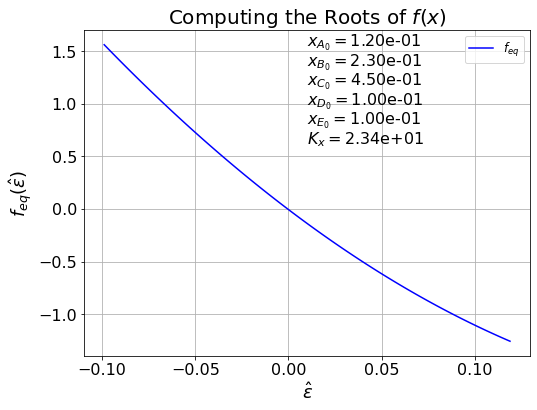

In [58]:
n_pts = 100

plot_function(ext_hat_min, ext_hat_max, n_pts, x_a_0, x_b_0, x_c_0, x_d_0, x_e_0, eq_kx_cte)

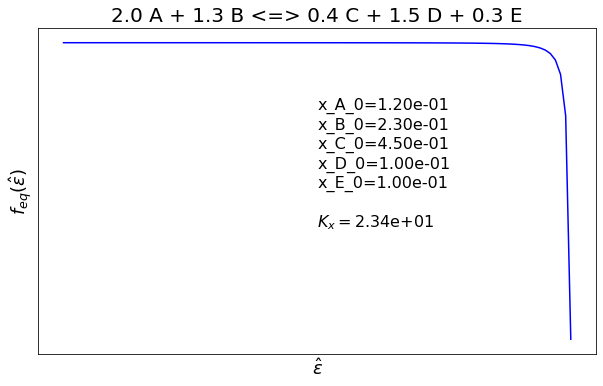

In [19]:
'''2.1) Plot equilibrium function'''


**Justification:**

### <span style="color:blue">[2.2)](#toa) Demonstrate the quadratic convergence of Newton's method and explain.
</span><a id="a22"></a>

In [60]:
'''2.2) Newton's method'''
def newton_solve(x_a_0, x_b_0, x_c_0, x_d_0, x_e_0, eq_kx_cte,
                 ext_hat_0=0.0, k_max=30, tolerance=1.0e-10, verbose=True):

    # Other initialization
    delta_k = 1e+10   # Newton's update
    f_k     = 1e+10
    ext_hat = ext_hat_0

    if verbose is True:
        print('\n')
        print('******************************************************')
        print("          Newton's Method Iterations                  ")
        print('******************************************************')
        print("k |  f(e_k)  |  f'(e_k) | |del e_k| |    e_k   |convg|")
        print('------------------------------------------------------')

    import math
    
    k = 0 # step counter
    
    while (abs(delta_k) > tolerance or abs(f_k) > tolerance) and k <= k_max:
        
        f_k       = f_eq(ext_hat, x_a_0, x_b_0, x_c_0, x_d_0, x_e_0, eq_kx_cte)
        
        f_prime_k = f_eq_prime(ext_hat, x_c_0, x_d_0, x_e_0, eq_kx_cte)
        
        delta_k_old = delta_k
        
        delta_k = -f_k / f_prime_k # Newton's update
        
        ext_hat += delta_k
        
        if k > 0:
            if delta_k != 0.0 and delta_k_old != 0.0:
                convergence_factor = math.log(abs(delta_k),10) / math.log(abs(delta_k_old),10)
            else:
                convergence_factor = 0.0  
        else:
            convergence_factor = 0.0
            
        k = k + 1 # increment counter
        
        if verbose is True:
            print('%2i %+5.3e %+5.3e %+5.3e  %+5.3e %5.2f'%\
                  (k,f_k, f_prime_k, abs(delta_k), ext_hat, convergence_factor))
            
    # Exit the while loop here
    if verbose is True:
        print('******************************************************') 
        print('Root = %8.5e'%ext_hat)
    
    return ext_hat

In [63]:
'''2.2) Find root and equilibrium molar fractions'''
ext_hat_0 = (ext_hat_max+ext_hat_min)/2.0  # initial guess

k_max = 20         # maximum # of Newton iterations
tolerance = 1.0e-8 # convergence tolerance

ext_hat = newton_solve(x_a_0, x_b_0, x_c_0, x_d_0, x_e_0, eq_kx_cte,
                       ext_hat_0, k_max, tolerance)

x_a = (x_a_0 - ext_hat)/(1.0-ext_hat)
x_b = (x_b_0 - ext_hat)/(1.0-ext_hat)
x_c = (x_c_0 + ext_hat)/(1.0-ext_hat)
x_d = (x_d_0 + ext_hat)/(1.0-ext_hat)
x_e = (x_e_0 + ext_hat)/(1.0-ext_hat)

assert x_a >= 0. and x_b >= 0. and x_c >= 0. and x_d >= 0. and x_e >= 0. 


print('')
print('Equilibrium mole fractions:\n')
print('x_a = %5.3e (%4.1f%%)'%(x_a,round(x_a*100,1)))
print('x_b = %5.3e (%4.1f%%)'%(x_b,round(x_b*100,1)))
print('x_c = %5.3e (%4.1f%%)'%(x_c,round(x_c*100,1)))
print('x_d = %5.3e (%4.1f%%)'%(x_d,round(x_d*100,1)))
print('x_e = %5.3e (%4.1f%%)'%(x_e,round(x_e*100,1)))



******************************************************
          Newton's Method Iterations                  
******************************************************
k |  f(e_k)  |  f'(e_k) | |del e_k| |    e_k   |convg|
------------------------------------------------------
 1 -1.359e-01 -8.052e+00 +1.688e-02  -6.880e-03  0.00
 2 +8.933e-02 -8.876e+00 +1.006e-02  +3.184e-03  1.13
 3 -4.664e-02 -8.385e+00 +5.563e-03  -2.379e-03  1.13
 4 +2.790e-02 -8.656e+00 +3.223e-03  +8.446e-04  1.11
 5 -1.548e-02 -8.499e+00 +1.821e-03  -9.765e-04  1.10
 6 +8.968e-03 -8.588e+00 +1.044e-03  +6.776e-05  1.09
 7 -5.069e-03 -8.537e+00 +5.938e-04  -5.261e-04  1.08
 8 +2.906e-03 -8.566e+00 +3.393e-04  -1.867e-04  1.08
 9 -1.653e-03 -8.549e+00 +1.934e-04  -3.801e-04  1.07
10 +9.445e-04 -8.559e+00 +1.104e-04  -2.697e-04  1.07
11 -5.382e-04 -8.553e+00 +6.293e-05  -3.327e-04  1.06
12 +3.072e-04 -8.556e+00 +3.590e-05  -2.968e-04  1.06
13 -1.752e-04 -8.554e+00 +2.048e-05  -3.172e-04  1.05
14 +9.994e-05 -8.555e

**Explanation of quadratic convergence:** 

### <span style="color:blue"> [2.3)](#toa) Plot the normalized extent of reaction at equilibrium on the equilibrium function plot.</span><a id="a23"></a>

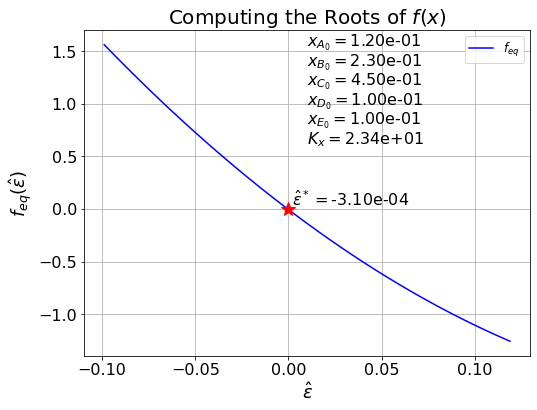

In [64]:
'''2.3) Plot equilibrium function with root'''
n_pts = 100

plot_function(ext_hat_min, ext_hat_max, n_pts, x_a_0, x_b_0, x_c_0, x_d_0, x_e_0, eq_kx_cte, ext_hat)

## <span style="color:blue">[Assignment 3 (40 pts)](#toa)</span><a id="a3"></a>

### <span style="color:blue"> Find the equilibrium molar fraction for the following reaction:</span>
<br>
<span style="color:blue">
\begin{equation*}
\nu_A\,\text{A} + \nu_B\,\text{B} + \nu_C\,\text{C}
\overset{K_x}{\longleftrightarrow} 
\nu_D\,\text{D} + \nu_E\,\text{E} + \nu_F\,\text{F}
\end{equation*}
</span>

### <span style="color:blue"> taking place in a closed reactor vessel. At some initial time, the charge to the reactor vessel was:</span>

Name                        | Parameter    | Value  | Name     | Parameter | Value |
----------------------------|--------------|--------|----------|-----------|-------|
initial mole fraction of A  | $x_{A_0}$    | 0.4    | stoic. A | $\nu_A$   |  1.7  |
initial mole fraction of B  | $x_{B_0}$    | 0.1    | stoic. B | $\nu_B$   |  2.1  |
initial mole fraction of C  | $x_{C_0}$    | 0.01   | stoic. C | $\nu_C$   |  1.5  |
initial mole fraction of D  | $x_{D_0}$    | 0.1    | stoic. D | $\nu_D$   |  3    |
initial mole fraction of E  | $x_{E_0}$    | 0.3    | stoic. E | $\nu_E$   |  3.8  |
initial mole fraction of F  | $x_{F_0}$    |residual| stoic. F | $\nu_F$   |  1.2  |
mole equilibrium constant   | $K_\text{x}$ | 87.9   |     .    |    .      |  .    |

### <span style="color:blue">[3.1)](#toa) Produce a plot of the equilibrium function as a function of the normalized extent of reaction. How many roots are there? What is an initial guess for Newton's method to find the appropriate root? Justfiy your answer.</span><a id="a31"></a>

In [70]:
'''3.1) Parameters for chemical equilibrium of A + B + C <-> D + E + F'''
x_a_0 = 0.4
x_b_0 = 0.1
x_c_0 = 0.01
x_d_0 = 0.1
x_e_0 = 0.3
x_f_0 = 0.09

species_names = ['A','B','C','D','E','F']

import numpy as np
stoic_row = np.array([-1.7, -2.1, -1.5, 3, 3.8, 1.2])

reaction =  str(-stoic_row[0])+' A + '+str(-stoic_row[1])+' B + '+str(-stoic_row[2])+' C '\
           +' <=>  '\
           +str(stoic_row[3])+' D + ' +str(stoic_row[4])+' E + '+str(stoic_row[5])+' F '

x_vec_0 = np.array([x_a_0, x_b_0, x_c_0, x_d_0, x_e_0, x_f_0])

assert abs(np.sum(x_vec_0) - 1.0) <= 1e-12
assert np.all(x_vec_0 >=0.0)

eq_kx_cte = 87.9

print('reaction: ',reaction)

reaction:  1.7 A + 2.1 B + 1.5 C  <=>  3.0 D + 3.8 E + 1.2 F 


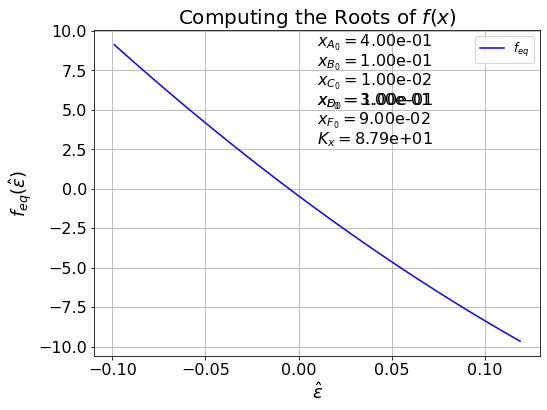

In [73]:
'''3.1) Plot equilibrium function'''

def f_eq(ext_hat, x_a_0, x_b_0, x_c_0, x_d_0, x_e_0, x_f_0, eq_kx_cte):
    """Root function f(ext_hat) for A + B <=> C.

    Parameters
    ----------
    ext_hat: float or numpy.ndarray, required
        Normalized extent of reaction. If `ext_hat` is an array, 
        the return value is also an array of values.
    x_a_0: float, required
        Mole fraction of species A.
    x_b_0: float, required
        Mole fraction of species B.
    x_c_0: float, required
        Mole fraction of species B.
    eq_kx_cte: float, required
        Mole equilibrium reaction constant.
    
    Returns
    -------
    value: float or numpy.ndarray
        Value or array of values of the equilibrium function 
        evaluated at `ext_hat`.

    Examples
    --------
    """
    
    assert abs(x_a_0 + x_b_0 + x_c_0 + x_d_0 + x_e_0 + x_f_0 - 1.0) <= 1e-12
           
    value =   (eq_kx_cte+1)*ext_hat**2  \
            - (1-x_c_0)*(eq_kx_cte+1)*ext_hat \
            + x_a_0 * x_b_0 * x_c_0 * eq_kx_cte - x_d_0 - x_e_0 - x_f_0
        
    return value

def plot_function(ex_min, ex_max, n_pts,
                  x_a_0, x_b_0, x_c_0, x_d_0, x_e_0, x_f_0, eq_kx_cte,
                  ext_hat_root=None  ):
    
    import matplotlib.pyplot as plt
    %matplotlib inline
    
    plt.figure(1, figsize=(8, 6))
    
    import numpy as np
    ex_vec = np.linspace(ex_min, ex_max, n_pts)
    
    plt.plot(ex_vec, f_eq(ex_vec, x_a_0, x_b_0, x_c_0, x_d_0, x_e_0, x_f_0, eq_kx_cte),'b-',label='$f_{eq}$')
    
    plt.xlabel(r'$\hat{\varepsilon}$',fontsize=18)
    plt.ylabel(r'$f_{eq}(\hat{\varepsilon})$',fontsize=18)
    plt.title('Computing the Roots of $f(x)$',fontsize=20)
    plt.legend(loc='best',fontsize=12)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    
    (x_min,x_max) = plt.xlim()
    dx = abs(x_max-x_min)
    x_text = (x_max+x_min)/2
    
    (y_min,y_max) = plt.ylim()
    dy = abs(y_max-y_min)
    y_text = y_max - dy*0.05
    
    plt.text(x_text, y_text, r'$x_{A_0}=$%8.2e'%x_a_0,fontsize=16)
    y_text -= dy*0.06
    plt.text(x_text, y_text, r'$x_{B_0}=$%8.2e'%x_b_0,fontsize=16)
    y_text -= dy*0.06
    plt.text(x_text, y_text, r'$x_{C_0}=$%8.2e'%x_c_0,fontsize=16)
    y_text -= dy*0.06
    plt.text(x_text, y_text, r'$x_{D_0}=$%8.2e'%x_d_0,fontsize=16)
    y_text -= dy*0.0
    plt.text(x_text, y_text, r'$x_{E_0}=$%8.2e'%x_e_0,fontsize=16)
    y_text -= dy*0.06
    plt.text(x_text, y_text, r'$x_{F_0}=$%8.2e'%x_f_0,fontsize=16)
    y_text -= dy*0.06
    plt.text(x_text, y_text, r'$K_x=$%8.2e'%eq_kx_cte,fontsize=16)
    
    
    if ext_hat_root is not None:
        
        plt.plot(ext_hat_root, 0.0,'r*',label='root',markersize=14)
               
        (x_min,x_max) = plt.xlim()
        dx = abs(x_max-x_min)
        x_text = ext_hat_root + dx*0.01
    
        (y_min,y_max) = plt.ylim()
        dy = abs(y_max-y_min)
        y_text = 0.0 + dy*0.01
    
        plt.text(x_text, y_text, r'$\hat{\varepsilon}^*=$%8.2e'%ext_hat_root,fontsize=16)
    
    
    plt.grid(True)
    plt.show()
    print('')
    
    return

n_pts = 100

plot_function(ext_hat_min, ext_hat_max, n_pts, x_a_0, x_b_0, x_c_0, x_d_0, x_e_0, x_f_0, eq_kx_cte)

**Justification:**

### <span style="color:blue">[3.2)](#toa) Demonstrate the quadratic convergence of Newton's method and explain.</span><a id="a32"></a>

In [74]:
'''3.2) Find root and equilibrium molar fractions'''
def f_eq_prime(ext_hat, x_d_0, x_e_0, x_f_0, eq_kx_cte):
      
    value = 2.0*(eq_kx_cte+1)*ext_hat - (1-x_d_0-x_e_0-x_f_0)*(eq_kx_cte+1)
        
    return value
def newton_solve(x_a_0, x_b_0, x_c_0, x_d_0, x_e_0, x_f_0, eq_kx_cte,
                 ext_hat_0=0.0, k_max=30, tolerance=1.0e-10, verbose=True):

    # Other initialization
    delta_k = 1e+10   # Newton's update
    f_k     = 1e+10
    ext_hat = ext_hat_0

    if verbose is True:
        print('\n')
        print('******************************************************')
        print("          Newton's Method Iterations                  ")
        print('******************************************************')
        print("k |  f(e_k)  |  f'(e_k) | |del e_k| |    e_k   |convg|")
        print('------------------------------------------------------')

    import math
    
    k = 0 # step counter
    
    while (abs(delta_k) > tolerance or abs(f_k) > tolerance) and k <= k_max:
        
        f_k       = f_eq(ext_hat, x_a_0, x_b_0, x_c_0, x_d_0, x_e_0, x_f_0, eq_kx_cte)
        
        f_prime_k = f_eq_prime(ext_hat, x_d_0, x_e_0, x_f_0, eq_kx_cte)
        
        delta_k_old = delta_k
        
        delta_k = -f_k / f_prime_k # Newton's update
        
        ext_hat += delta_k
        
        if k > 0:
            if delta_k != 0.0 and delta_k_old != 0.0:
                convergence_factor = math.log(abs(delta_k),10) / math.log(abs(delta_k_old),10)
            else:
                convergence_factor = 0.0  
        else:
            convergence_factor = 0.0
            
        k = k + 1 # increment counter
        
        if verbose is True:
            print('%2i %+5.3e %+5.3e %+5.3e  %+5.3e %5.2f'%\
                  (k,f_k, f_prime_k, abs(delta_k), ext_hat, convergence_factor))
            
    # Exit the while loop here
    if verbose is True:
        print('******************************************************') 
        print('Root = %8.5e'%ext_hat)
    
    return ext_hat

ext_hat_0 = (ext_hat_max+ext_hat_min)/2.0  # initial guess

k_max = 20         # maximum # of Newton iterations
tolerance = 1.0e-8 # convergence tolerance

ext_hat = newton_solve(x_a_0, x_b_0, x_c_0, x_d_0, x_e_0, x_f_0, eq_kx_cte,
                       ext_hat_0, k_max, tolerance)

x_a = (x_a_0 - ext_hat)/(1.0-ext_hat)
x_b = (x_b_0 - ext_hat)/(1.0-ext_hat)
x_c = (x_c_0 + ext_hat)/(1.0-ext_hat)
x_d = (x_d_0 + ext_hat)/(1.0-ext_hat)
x_e = (x_e_0 + ext_hat)/(1.0-ext_hat)
x_f = (x_f_0 + ext_hat)/(1.0-ext_hat)

assert x_a >= 0. and x_b >= 0. and x_c >= 0. and x_d >= 0. and x_e >= 0. and x_f >= 0.

print('')
print('Equilibrium mole fractions:\n')
print('x_a = %5.3e (%4.1f%%)'%(x_a,round(x_a*100,1)))
print('x_b = %5.3e (%4.1f%%)'%(x_b,round(x_b*100,1)))
print('x_c = %5.3e (%4.1f%%)'%(x_c,round(x_c*100,1)))
print('x_d = %5.3e (%4.1f%%)'%(x_d,round(x_c*100,1)))
print('x_e = %5.3e (%4.1f%%)'%(x_e,round(x_c*100,1)))
print('x_f = %5.3e (%4.1f%%)'%(x_f,round(x_c*100,1)))



******************************************************
          Newton's Method Iterations                  
******************************************************
k |  f(e_k)  |  f'(e_k) | |del e_k| |    e_k   |convg|
------------------------------------------------------
 1 -1.326e+00 -4.356e+01 +3.044e-02  -2.044e-02  0.00
 2 +1.381e+00 -4.897e+01 +2.821e-02  +7.765e-03  1.02
 3 -1.133e+00 -4.396e+01 +2.577e-02  -1.801e-02  1.03
 4 +1.159e+00 -4.854e+01 +2.387e-02  +5.866e-03  1.02
 5 -9.680e-01 -4.430e+01 +2.185e-02  -1.599e-02  1.02
 6 +9.750e-01 -4.818e+01 +2.024e-02  +4.248e-03  1.02
 7 -8.271e-01 -4.458e+01 +1.855e-02  -1.430e-02  1.02
 8 +8.222e-01 -4.788e+01 +1.717e-02  +2.868e-03  1.02
 9 -7.066e-01 -4.483e+01 +1.576e-02  -1.289e-02  1.02
10 +6.946e-01 -4.763e+01 +1.458e-02  +1.691e-03  1.02
11 -6.034e-01 -4.504e+01 +1.340e-02  -1.171e-02  1.02
12 +5.877e-01 -4.742e+01 +1.239e-02  +6.858e-04  1.02
13 -5.152e-01 -4.522e+01 +1.139e-02  -1.071e-02  1.02
14 +4.977e-01 -4.724e

**Explanation of quadratic convergence:**

### <span style="color:blue">[3.3)](#toa) Plot the normalized extent of reaction at equilibrium on the equilibrium function plot.</span><a id="a33"></a>

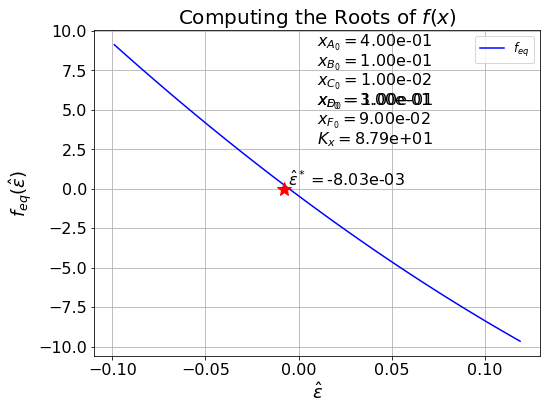

In [76]:
'''3.3) Plot equilibrium function with root'''

n_pts = 100

plot_function(ext_hat_min, ext_hat_max, n_pts, x_a_0, x_b_0, x_c_0, x_d_0, x_e_0, x_f_0, eq_kx_cte, ext_hat)

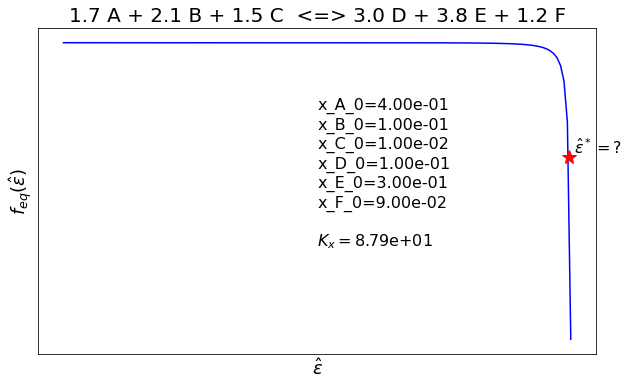

## <span style="color:blue">[Assignment 4 (5 pts)](#toa)</span><a id="a4"></a>

### <span style="color:blue">Describe the most unclear point in the content presented so far. Then, make an effort to clarify the point on your own.</span>
I had some trouble with the code for the first reaction problem. I think it was just a mistake with copying over some of the code. I tried to go through it line by line and I am probably just missed my mistake but that was my only problem with this lab.
